In [436]:
import sys
sys.path.append("../../src")

# Production study: weight manipulation

In [437]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [438]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [439]:
import data

In [440]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id",
                             "practice_sentence"))

EXPERIMENT_ID = "06_production_spray-load-weight"
response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "survey-multi-choice-ext")] \
    .reset_index().set_index(["uniqueid", "trial_index"])

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90QHJGJR0VB8S6T77C. Status was 1.


In [441]:
response_df.head()

condition  \
uniqueid                                      trial_index              
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3                    0   
                                              5                    0   
                                              6                    0   
                                              7                    0   
                                              8                    0   

                                                           counterbalance  \
uniqueid                                      trial_index                   
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3                         0   
                                              5                         0   
                                              6                         0   
                                              7                         0   
                                              8                         0   

                                                                             assignmentId  \
uniqueid                                      trial_index                                   
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   
                                              5            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   
                                              6            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   
                                              7            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   
                                              8            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   

                                                                 workerId  \
uniqueid                                      trial_index                   
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            A173A97OFDAX9F   
                                              5            A173A97OFDAX9F   
                                              6            A173A97OFDAX9F   
                                              7            A173A97OFDAX9F   
                                              8            A173A97OFDAX9F   

                                                                                    hitId  \
uniqueid                                      trial_index                                   
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   
                                              5            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   
                                              6            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   
                                              7            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   
                                              8            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   

                                                                        trial_type  \
uniqueid                                      trial_index                            
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            survey-multi-choice-ext   
                                              5            survey-multi-choice-ext   
                                              6            survey-multi-choice-ext   
                                              7            survey-multi-choice-ext   
                                              8            survey-multi-choice-ext   

                                                               rt  \
uniqueid                                      trial_index           
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            5645.9   
                                              5            8438.1   
                                              6            3709.1   
                                              7            6245.9   
                                              8            4022.9   

                                                          internal_node_id  \
uniqu

In [442]:
# Expand condition labels, which are tuples
response_df = pd.concat([response_df, response_df.condition_id.apply(pd.Series).rename(columns=lambda x: f"condition_{x}")], axis=1) \
    .drop(columns="condition_id")

In [443]:
# Convert condition_id to independent features
response_df["location_is_heavy"] = response_df["condition_1"] == 1
response_df["theme_is_heavy"] = response_df["condition_2"] == 1

In [444]:
# dtype fixes
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [445]:
response_df.head()

condition  \
uniqueid                                      trial_index              
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3                    0   
                                              5                    0   
                                              6                    0   
                                              7                    0   
                                              8                    0   

                                                           counterbalance  \
uniqueid                                      trial_index                   
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3                         0   
                                              5                         0   
                                              6                         0   
                                              7                         0   
                                              8                         0   

                                                                             assignmentId  \
uniqueid                                      trial_index                                   
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   
                                              5            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   
                                              6            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   
                                              7            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   
                                              8            3DI28L7YXB2Z7TQPH8GO5VCCB52E19   

                                                                 workerId  \
uniqueid                                      trial_index                   
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            A173A97OFDAX9F   
                                              5            A173A97OFDAX9F   
                                              6            A173A97OFDAX9F   
                                              7            A173A97OFDAX9F   
                                              8            A173A97OFDAX9F   

                                                                                    hitId  \
uniqueid                                      trial_index                                   
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   
                                              5            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   
                                              6            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   
                                              7            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   
                                              8            3X2LT8FDHW68C9Y8BRE7IRATZ8LW80   

                                                                        trial_type  \
uniqueid                                      trial_index                            
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            survey-multi-choice-ext   
                                              5            survey-multi-choice-ext   
                                              6            survey-multi-choice-ext   
                                              7            survey-multi-choice-ext   
                                              8            survey-multi-choice-ext   

                                                               rt  \
uniqueid                                      trial_index           
A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19 3            5645.9   
                                              5            8438.1   
                                              6            3709.1   
                                              7            6245.9   
                                              8            4022.9   

                                                          internal_node_id  \
uniqu

In [446]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [447]:
subjects = set(response_df.index.get_level_values("uniqueid"))
len(subjects)

52

### Demo

In [448]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

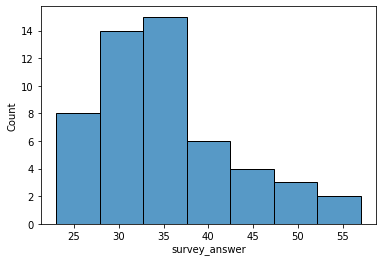

In [449]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [450]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    39
Master's degree       8
Some college          4
High school/GED       1
Name: survey_answer, dtype: int64

In [451]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    52
Name: survey_answer, dtype: int64

### Comments

In [452]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid                                     
37           A173A97OFDAX9F:3DI28L7YXB2Z7TQPH8GO5VCCB52E19                        nope, thanks
             A3F5Z5S2AHMN2O:3QXNC7EIPJJI58EQDEW2ZCSRFGG90R                                none
             A3V6ZE9DJ9SGJ7:38JBBYETQPYGZSN84QZQ3TJFNPCE4M                                nice
             AKRUNNDSSSXYR:3137ONMDKHTWB8GSZR1RCIGIDUNEGB               Very interesting study
             A2BIFWX22JRCRB:3OLQQLKKNTD62A6T7XMU9V8Y5M4JEK                        INTERESTING 
             AJ4PH5TH4ZGIA:3U84XHCDID1EANE40DD3O3KXBVN4ZK                             THANKYOU
             A167C6CHGYY95P:3H7XDTSHKDFQS82JKRVXYONIKYSGWT                                  no
             A2X4Z6BYTUE8MC:3CN4LGXD5YCE5X4Z4RBKAWBV51J4YT                        It was good.
             AT1PX2W4DFV35:3NPFYT4IZDS5H879UWRJ071PT0YGXM          The survey was interesting.
             A106M0HTZXY7JK:3CTOC39K38ELTVRJKP8O3LGHJZYJ7W                            

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

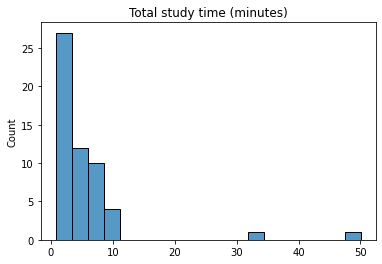

In [453]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [454]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.457598
std     7.698519
Name: rt, dtype: float64

### Response times

In [455]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

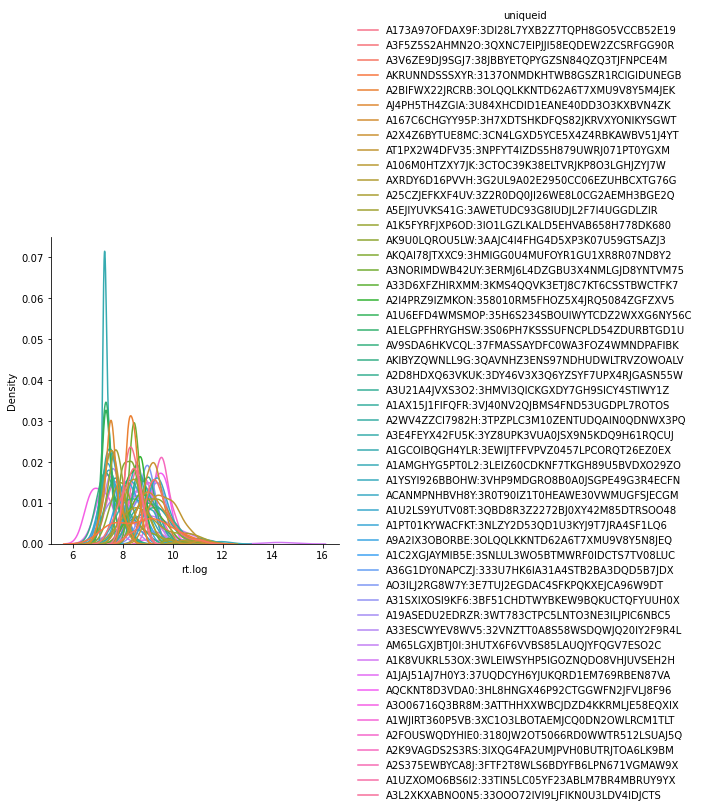

In [456]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

## Attention checks

### Practice round

In [457]:
practice_attention_failures = response_df[response_df.practice_sentence == True].survey_answer == "bad"
practice_attention_failures = practice_attention_failures.loc[practice_attention_failures]
practice_attention_failures

uniqueid                                       trial_index
A3V6ZE9DJ9SGJ7:38JBBYETQPYGZSN84QZQ3TJFNPCE4M  3              True
A5EJIYUVKS41G:3AWETUDC93G8IUDJL2F7I4UGGDLZIR   3              True
AK9U0LQROU5LW:3AAJC4I4FHG4D5XP3K07U59GTSAZJ3   3              True
A3NORIMDWB42UY:3ERMJ6L4DZGBU3X4NMLGJD8YNTVM75  3              True
A1U6EFD4WMSMOP:35H6S234SBOUIWYTCDZ2WXXG6NY56C  3              True
A1ELGPFHRYGHSW:3S06PH7KSSSUFNCPLD54ZDURBTGD1U  3              True
A2D8HDXQ63VKUK:3DY46V3X3Q6YZSYF7UPX4RJGASN55W  3              True
A1U2LS9YUTV08T:3QBD8R3Z2272BJ0XY42M85DTRSOO48  3              True
A1PT01KYWACFKT:3NLZY2D53QD1U3KYJ9T7JRA4SF1LQ6  3              True
A36G1DY0NAPCZJ:333U7HK6IA31A4STB2BA3DQD5B7JDX  3              True
A19ASEDU2EDRZR:3WT783CTPC5LNTO3NE3ILJPIC6NBC5  3              True
Name: survey_answer, dtype: bool

### Fillers

<AxesSubplot:xlabel='survey_answer'>

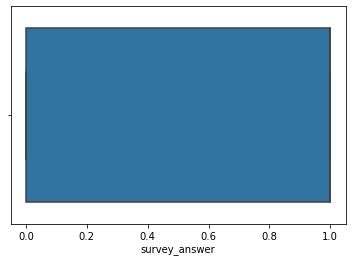

In [458]:
# some fillers aren't good, upon reflection. drop them from evaluation
drop_fillers = []

filler_stats = response_df[response_df.condition_0 == "filler"].reset_index() \
    .groupby(["uniqueid", "item_id", "condition_1"]).apply(lambda xs: (xs[~xs.item_id.isin(drop_fillers)].survey_answer == "good").astype(float))
sns.boxplot(data=filler_stats.reset_index(), x="survey_answer", hue="uniqueid")

In [459]:
filler_stats_summary = filler_stats.groupby("uniqueid").mean()
filler_stats_summary.sort_values()

uniqueid
A33ESCWYEV8WV5:32VNZTT0A8S58WSDQWJQ20IY2F9R4L    0.250000
AKIBYZQWNLL9G:3QAVNHZ3ENS97NDHUDWLTRVZOWOALV     0.333333
A19ASEDU2EDRZR:3WT783CTPC5LNTO3NE3ILJPIC6NBC5    0.333333
A1U2LS9YUTV08T:3QBD8R3Z2272BJ0XY42M85DTRSOO48    0.333333
A1JAJ51AJ7H0Y3:37UQDCYH6YJUKQRD1EM769RBEN87VA    0.416667
A2S375EWBYCA8J:3FTF2T8WLS6BDYFB6LPN671VGMAW9X    0.416667
A1AX15J1FIFQFR:3VJ40NV2QJBMS4FND53UGDPL7ROTOS    0.416667
AK9U0LQROU5LW:3AAJC4I4FHG4D5XP3K07U59GTSAZJ3     0.500000
A1GCOIBQGH4YLR:3EWIJTFFVPVZ0457LPCORQT26EZ0EX    0.500000
A3O06716Q3BR8M:3ATTHHXXWBCJDZD4KKRMLJE58EQXIX    0.500000
A36G1DY0NAPCZJ:333U7HK6IA31A4STB2BA3DQD5B7JDX    0.583333
A1U6EFD4WMSMOP:35H6S234SBOUIWYTCDZ2WXXG6NY56C    0.583333
A106M0HTZXY7JK:3CTOC39K38ELTVRJKP8O3LGHJZYJ7W    0.583333
A3U21A4JVXS3O2:3HMVI3QICKGXDY7GH9SICY4STIWY1Z    0.583333
A1ELGPFHRYGHSW:3S06PH7KSSSUFNCPLD54ZDURBTGD1U    0.583333
A5EJIYUVKS41G:3AWETUDC93G8IUDJL2F7I4UGGDLZIR     0.583333
A2D8HDXQ63VKUK:3DY46V3X3Q6YZSYF7UPX4RJGASN55W    0.583333
A2K9V

<AxesSubplot:xlabel='item_id', ylabel='survey_answer'>

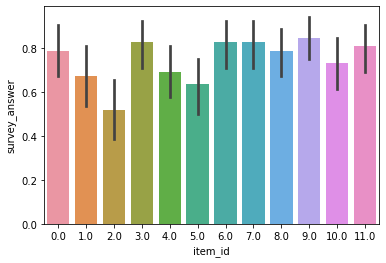

In [460]:
sns.barplot(data=filler_stats.reset_index(), x="item_id", y="survey_answer")

In [461]:
# What are fillers that are commonly missed, for high-scoring people?
tmp = filler_stats.loc[filler_stats_summary[filler_stats_summary > 0.7].index]
tmp[tmp == 0].groupby(["item_id", "condition_1"]).size().sort_values(ascending=False)

item_id  condition_1
2.0      order          14
1.0      order           3
5.0      order           2
4.0      order           1
8.0      order           1
9.0      order           1
11.0     order           1
Name: survey_answer, dtype: int64

## Final data processing

In [462]:
exp_items = response_df[(response_df.condition_0 != "filler") & response_df.practice_sentence.isna()]

### Filter based on practice and attention checks

In [463]:
drop_pct = np.round(len(practice_attention_failures) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(practice_attention_failures)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(practice_attention_failures.index.get_level_values("uniqueid")))
exp_items = exp_items.drop(practice_attention_failures.index.get_level_values("uniqueid"), level="uniqueid")

attention_drops = filler_stats_summary[(filler_stats_summary < 0.7)]
drop_pct = np.round(len(attention_drops) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

11 subjects (21.2%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A3V6ZE9DJ9SGJ7:38JBBYETQPYGZSN84QZQ3TJFNPCE4M
	A5EJIYUVKS41G:3AWETUDC93G8IUDJL2F7I4UGGDLZIR
	AK9U0LQROU5LW:3AAJC4I4FHG4D5XP3K07U59GTSAZJ3
	A3NORIMDWB42UY:3ERMJ6L4DZGBU3X4NMLGJD8YNTVM75
	A1U6EFD4WMSMOP:35H6S234SBOUIWYTCDZ2WXXG6NY56C
	A1ELGPFHRYGHSW:3S06PH7KSSSUFNCPLD54ZDURBTGD1U
	A2D8HDXQ63VKUK:3DY46V3X3Q6YZSYF7UPX4RJGASN55W
	A1U2LS9YUTV08T:3QBD8R3Z2272BJ0XY42M85DTRSOO48
	A1PT01KYWACFKT:3NLZY2D53QD1U3KYJ9T7JRA4SF1LQ6
	A36G1DY0NAPCZJ:333U7HK6IA31A4STB2BA3DQD5B7JDX
	A19ASEDU2EDRZR:3WT783CTPC5LNTO3NE3ILJPIC6NBC5
24 subjects (46.2%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A106M0HTZXY7JK:3CTOC39K38ELTVRJKP8O3LGHJZYJ7W
	A19ASEDU2EDRZR:3WT783CTPC5LNTO3NE3ILJPIC6NBC5
	A1AX15J1FIFQFR:3VJ40NV2QJBMS4FND53UGDPL7ROTOS
	A1ELGPFHRYGHSW:3S06PH7KSSSUFNCPLD54ZDURBTGD1U
	A1GCOIBQGH4YLR:3EWIJTFFVPVZ0457LPCORQT26EZ0EX
	A1JAJ51AJ7H0Y3:37UQDCYH

In [464]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

27 subjects remaining.


### Compute match

In [465]:
exp_items["theme_is_object"] = exp_items.survey_answer.astype(int) == 1

In [466]:
# match: (T heavy => ~T is object) & (L heavy => T is object)
#    <=> (~T heavy or T is object) & (~L heavy or T is object)
exp_items["match"] = (~exp_items.theme_is_heavy | exp_items.theme_is_object) & (~exp_items.location_is_heavy | exp_items.theme_is_object)

### Merge in materials

In [467]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["item_key"] = materials_df.V.str.cat(materials_df["T"], sep=" ")

# NB this doesn't handle fillers correctly

In [468]:
keep_cols = ["item_key", "T", "T heavy", "L", "L heavy", "V", "scale type", "T plural?", "T mass?", "L plural?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

#### Compute linguistic control variables

In [469]:
import spacy
from spacy_syllables import SpacySyllables

pipeline = spacy.load("en_core_web_sm", exclude=["parser", "ner"])
pipeline.add_pipe("syllables", after="tagger")
def count_syllables(text):
    doc = pipeline(text)
    return sum(token._.syllables_count for token in doc
               if token._.syllables_count is not None)

In [470]:
all_strings = merged_df[["T", "T heavy", "L", "L heavy"]].melt().value.unique()
syllable_df = pd.Series({string: count_syllables(string) for string in all_strings}, name="syllable_count")
syllable_df

water                                                                2
soil                                                                 1
nuts                                                                 1
sugar                                                                2
marinade                                                             2
                                                                    ..
the half-collapsed wall facing north                                 8
the tall antique cedar shelves                                       6
the designer bag that had been forgotten in the closet for years    17
the leather suitcase inherited from %PERSON1_POSS% grandfather      12
the lightly glazed donuts which just finished cooking               11
Name: syllable_count, Length: 80, dtype: int64

In [471]:
for val, tgt in [("T", "syllable_count_theme_light"),
                 ("T heavy", "syllable_count_theme_heavy"),
                 ("L", "syllable_count_location_light"),
                 ("L heavy", "syllable_count_location_heavy")]:
    merged_df = pd.merge(merged_df, syllable_df.rename(tgt), left_on=val, right_index=True)

### Export

In [472]:
merged_df.to_csv("merged_df.csv")

## Analysis

<AxesSubplot:ylabel='match'>

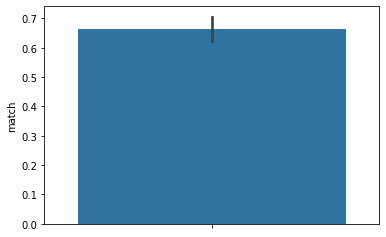

In [473]:
sns.barplot(data=exp_items.reset_index(), y="match")

<AxesSubplot:xlabel='theme_is_heavy', ylabel='theme_is_object'>

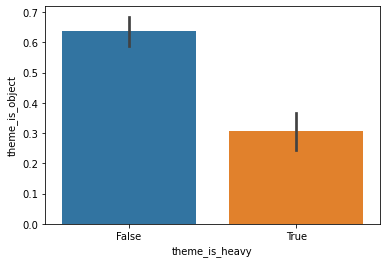

In [474]:
sns.barplot(data=exp_items.reset_index(), x="theme_is_heavy", y="theme_is_object")

### Item exposure

In [475]:
merged_df[merged_df.condition_0 != "filler"] \
    .groupby(["item_id", "item_key", "theme_is_heavy", "location_is_heavy"]).size().sort_values()

item_id  item_key                  theme_is_heavy  location_is_heavy
4.0      dab ointment              False           False                 5
26.0     smear grease              False           False                 5
41.0     stuff money               False           False                 6
1.0      cram clothes              True            False                 6
4.0      dab ointment              False           True                  6
16.0     plant lavender seedlings  False           True                  6
34.0     sprinkle nuts             False           False                 6
14.0     pack soil                 True            False                 6
43.0     wrap tape                 True            False                 7
34.0     sprinkle nuts             False           True                  7
9.0      heap appetizers           True            False                 7
19.0     rub marinade              True            False                 7
32.0     spray paint           

### Influence of weight

### Other control variables

<AxesSubplot:xlabel='T plural?', ylabel='match'>

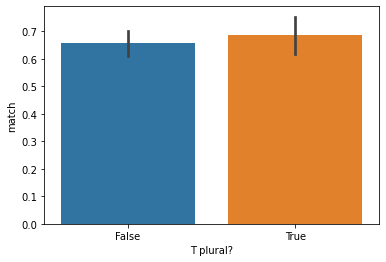

In [476]:
sns.barplot(data=merged_df.reset_index(), x="T plural?", y="match")

<AxesSubplot:xlabel='T mass?', ylabel='match'>

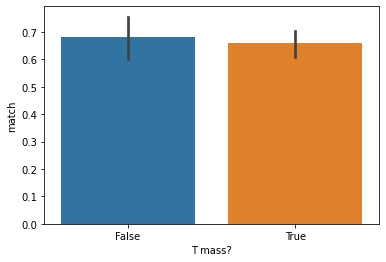

In [477]:
sns.barplot(data=merged_df.reset_index(), x="T mass?", y="match")

<AxesSubplot:xlabel='L plural?', ylabel='match'>

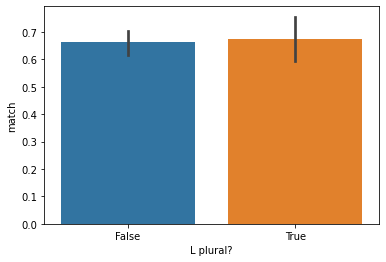

In [478]:
sns.barplot(data=merged_df.reset_index(), x="L plural?", y="match")

<AxesSubplot:xlabel='L plural?', ylabel='theme_is_object'>

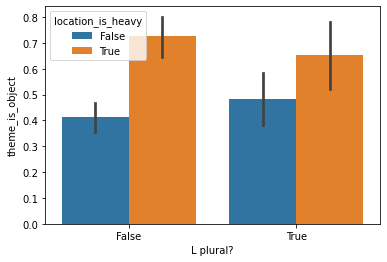

In [479]:
sns.barplot(data=merged_df.reset_index(), x="L plural?", hue="location_is_heavy", y="theme_is_object")

### By item

<AxesSubplot:xlabel='Theme object(Light - Heavy)', ylabel='Count'>

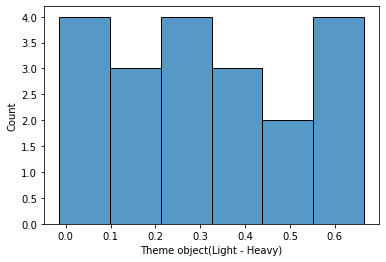

In [480]:
def compute_item_differences(rows):
    rows = rows.set_index("theme_is_heavy")
    if True not in rows.index or False not in rows.index:
        return np.nan
    return rows.loc[False, "theme_is_object"].mean() - rows.loc[True, "theme_is_object"].mean()
item_differences = merged_df.groupby(["item_id", "item_key"]).apply(compute_item_differences).rename("Theme object(Light - Heavy)")
sns.histplot(item_differences)

In [481]:
item_differences.sort_values()

item_id  item_key                
10.0     inject jelly               -0.014286
14.0     pack soil                   0.000000
25.0     slather mayonnaise          0.055556
9.0      heap appetizers             0.078571
6.0      drizzle frosting            0.121429
38.0     stock spices                0.170588
43.0     wrap tape                   0.171429
36.0     stack books                 0.222222
41.0     stuff money                 0.271429
0.0      brush powder                0.288235
35.0     squirt water                0.323864
34.0     sprinkle nuts               0.340659
7.0      dust sugar                  0.366667
1.0      cram clothes                0.380952
16.0     plant lavender seedlings    0.448864
26.0     smear grease                0.547059
19.0     rub marinade                0.600000
12.0     load hay                    0.633333
32.0     spray paint                 0.657143
4.0      dab ointment                0.664773
Name: Theme object(Light - Heavy), dtype: floa

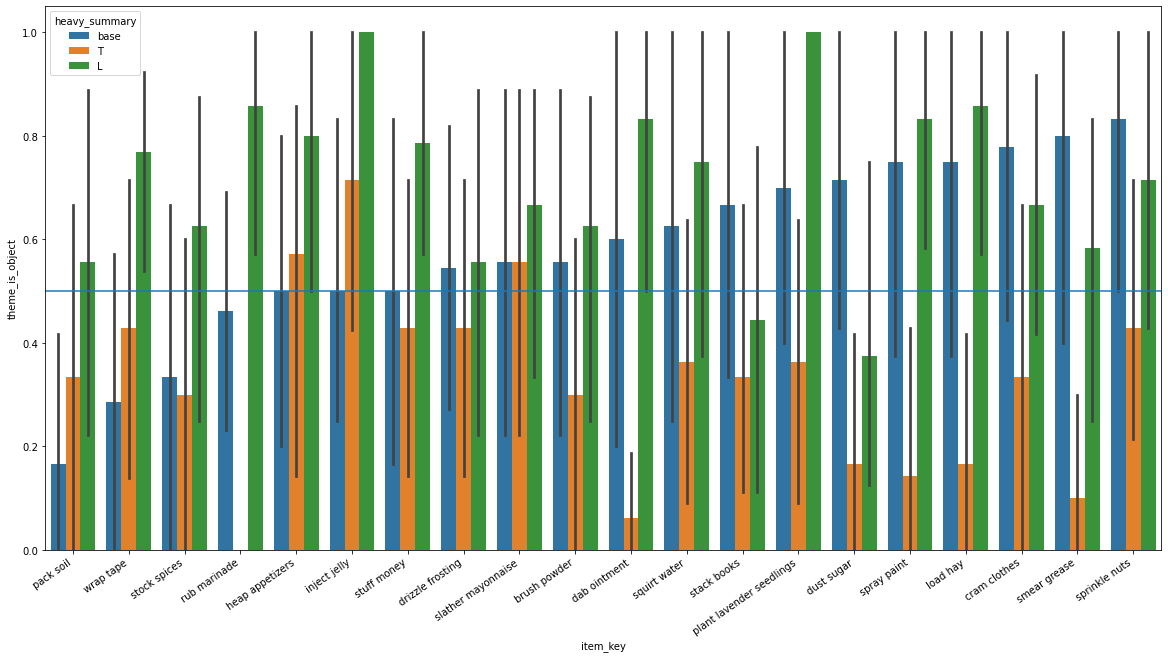

In [482]:
plt.subplots(figsize=(20, 10))
merged_df["heavy_summary"] = merged_df.set_index(["theme_is_heavy", "location_is_heavy"]).index.map({(False, False): "base", (True, False): "T", (False, True): "L"}.get)
order = merged_df.groupby(["item_key"]).apply(lambda xs: xs[xs.heavy_summary == "base"].theme_is_object.mean()).sort_values().index

ax = sns.barplot(data=merged_df.reset_index(), hue="heavy_summary", x="item_key", y="theme_is_object", order=order)
plt.xticks(rotation=35, ha="right")
ax.axhline(0.5)